In [ ]:
!pip install pycaret

In [6]:
import pandas as pd
from pycaret.classification import*

In [11]:
url = "/content/spam.csv"
data = pd.read_csv(url, encoding='latin1')

data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [15]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
from pycaret.classification import*
s = setup(data,target="v1",use_gpu=True)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,3639
1,Target,v1
2,Target type,Binary
3,Target mapping,"ham: 0, spam: 1"
4,Original data shape,"(5572, 2)"
5,Transformed data shape,"(5572, 2)"
6,Transformed train set shape,"(3900, 2)"
7,Transformed test set shape,"(1672, 2)"
8,Categorical features,1
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [18]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8864,0.6095,0.1529,1.0000,0.2630,0.2366,0.3645,0.2930
knn,K Neighbors Classifier,0.8864,0.5765,0.1529,1.0000,0.2630,0.2366,0.3645,0.2640
nb,Naive Bayes,0.8864,0.6095,0.1529,1.0000,0.2630,0.2366,0.3645,0.1830
dt,Decision Tree Classifier,0.8864,0.5765,0.1529,1.0000,0.2630,0.2366,0.3645,0.1880
svm,SVM - Linear Kernel,0.8864,0.0000,0.1529,1.0000,0.2630,0.2366,0.3645,0.1390
ridge,Ridge Classifier,0.8864,0.0000,0.1529,1.0000,0.2630,0.2366,0.3645,0.1410
rf,Random Forest Classifier,0.8864,0.5765,0.1529,1.0000,0.2630,0.2366,0.3645,0.7620
qda,Quadratic Discriminant Analysis,0.8864,0.6095,0.1529,1.0000,0.2630,0.2366,0.3645,0.1840
ada,Ada Boost Classifier,0.8864,0.5765,0.1529,1.0000,0.2630,0.2366,0.3645,0.1830
gbc,Gradient Boosting Classifier,0.8864,0.5778,0.1529,1.0000,0.2630,0.2366,0.3645,0.3830


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [19]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3639, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

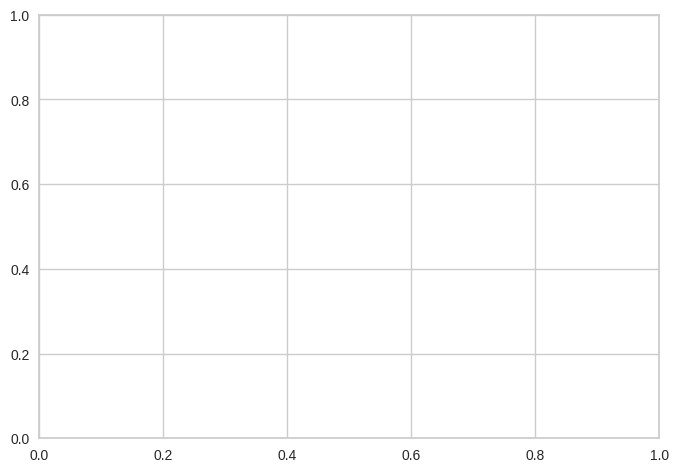

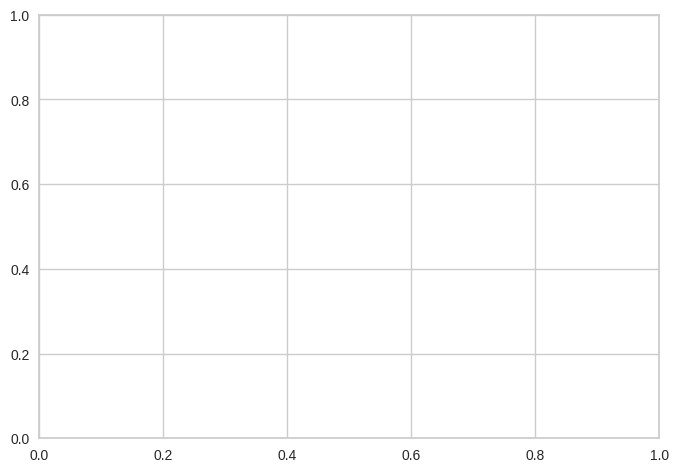

In [20]:
evaluate_model(best_model)

In [25]:
pred = predict_model(best_model)
pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8864,0.6128,0.1518,1.0000,0.2636,0.2366,0.3663


,v2,v1,prediction_label,prediction_score
1295,TELL HER I SAID EAT SHIT.,0,ham,0.9135
1188,All will come alive.better correct any good lo...,0,ham,0.9135
815,Where's my boytoy? I miss you ... What happened?,0,ham,0.9135
4890,Its worse if if uses half way then stops. Its ...,0,ham,0.9135
1572,Ur cash-balance is currently 500 pounds - to m...,1,ham,0.9135


In [26]:
tuned_model = tune_model(best_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8872,0.6132,0.1538,1.0000,0.2667,0.2396,0.3690
1,0.8821,0.5943,0.1154,1.0000,0.2069,0.1844,0.3187
2,0.8821,0.5865,0.1154,1.0000,0.2069,0.1844,0.3187
3,0.8974,0.6461,0.2308,1.0000,0.3750,0.3421,0.4543
4,0.8795,0.5882,0.0962,1.0000,0.1754,0.1557,0.2905
5,0.8923,0.6236,0.1923,1.0000,0.3226,0.2921,0.4136
6,0.8846,0.6070,0.1346,1.0000,0.2373,0.2124,0.3447
7,0.8846,0.5969,0.1509,1.0000,0.2623,0.2350,0.3649
8,0.8821,0.6008,0.1321,1.0000,0.2333,0.2082,0.3409


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [27]:
evaluate_model(tuned_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [28]:
predictions = predict_model(tuned_model)



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8864,0.6128,0.1518,1.0000,0.2636,0.2366,0.3663


In [29]:
save_model(tuned_model, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='...
                                                               handle_unknown='value',
                                                               hierarchy=None,
   